In [1]:
from scripts.gpx_parser import GPXParser
from scripts.elevation_profile import ElevationProfile
import matplotlib.pyplot as plt

In [ ]:
parser = GPXParser("sample_data/cycling_track.gpx")
track_df = parser.parse_to_dataframe()

profile = ElevationProfile(track_df)

In [4]:
climbs = profile.detect_climbs()
climbs

,start_idx,end_idx,start_km,end_km,length_m,gain_m,avg_grade_pct,max_grade_pct,start_lat,start_lon,end_lat,end_lon
0,460,497,11.483689,12.653832,1170.1,33.8,2.9,13.2,50.823033,19.201891,50.833426,19.203572
1,790,871,21.119134,23.219074,2099.9,92.7,4.4,18.0,50.822668,19.293559,50.806725,19.307184
2,1045,1079,28.413960,29.449967,1036.0,35.0,3.4,6.0,50.781091,19.362774,50.775423,19.373539
3,1648,1683,46.828814,47.854989,1026.2,54.9,5.4,26.4,50.695996,19.493611,50.691991,19.506569
4,1726,1811,49.112911,51.608715,2495.8,94.0,3.8,20.0,50.689266,19.520967,50.672250,19.507771
5,1897,1964,54.093424,55.802635,1709.2,81.0,4.7,11.6,50.660409,19.493770,50.659204,19.472687
6,2089,2166,59.549449,61.571442,2022.0,71.8,3.6,10.5,50.659377,19.437324,50.655223,19.414686
7,2286,2335,65.282442,66.622126,1339.7,48.2,3.6,8.1,50.667941,19.379586,50.666167,19.362512
8,2575,2640,73.613721,75.647208,2033.5,53.0,2.6,6.6,50.688493,19.288409,50.705789,19.283723


In [5]:
profile.compute_slope_lengths()

c:\Users\Michal\Desktop\Orbita 25\GPX-analyzer\scripts\elevation_profile.py:159: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("slope_range")["segment_length_km"].sum().reset_index().rename(


,slope_range,length_km,% of total
0,< 2%,88.87,84.30
1,2 ~ 4%,10.71,10.15
2,4 ~ 6%,3.68,3.49
3,6 ~ 8%,1.85,1.75
4,>= 8%,0.32,0.31


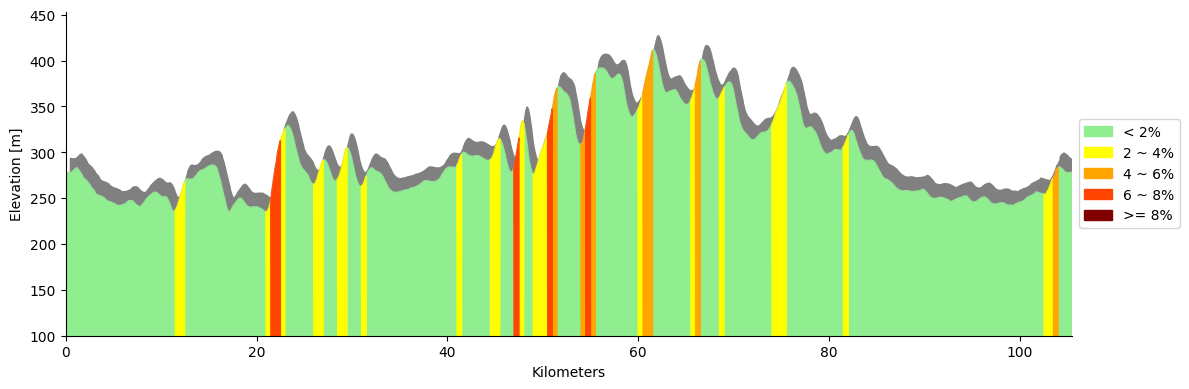

In [6]:
plot = profile.plot_profile()
plt.show()

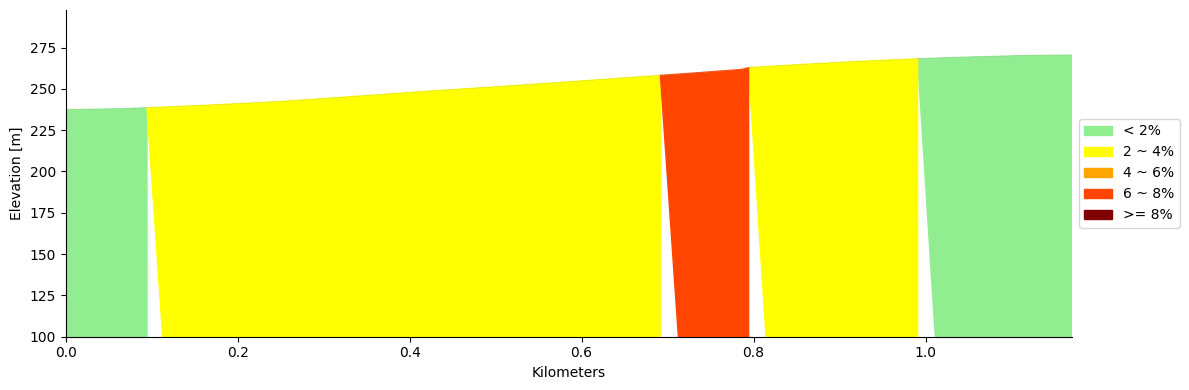

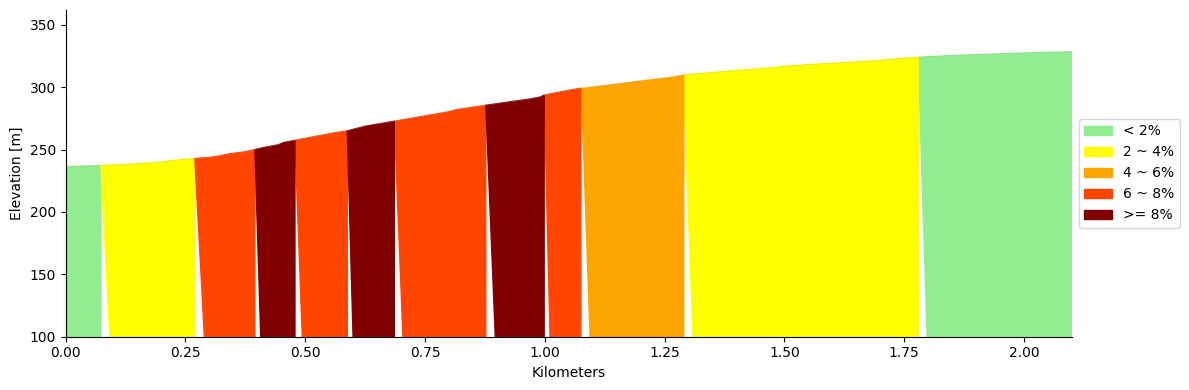

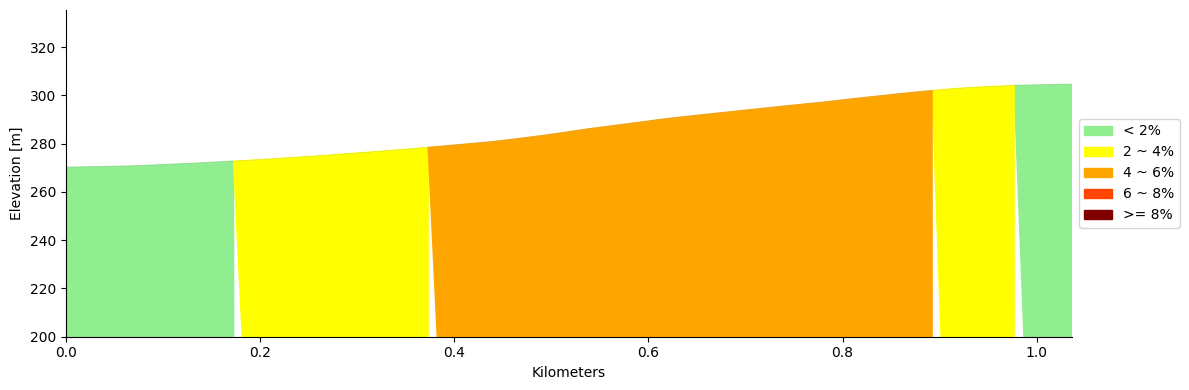

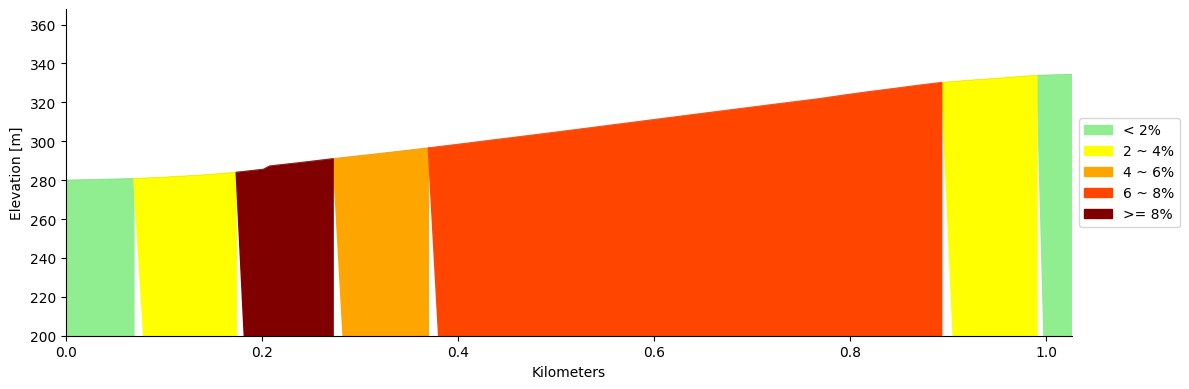

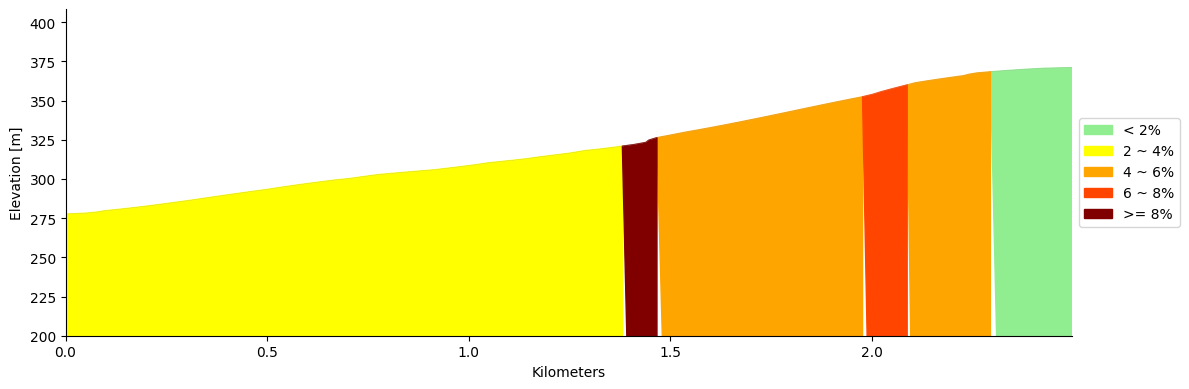

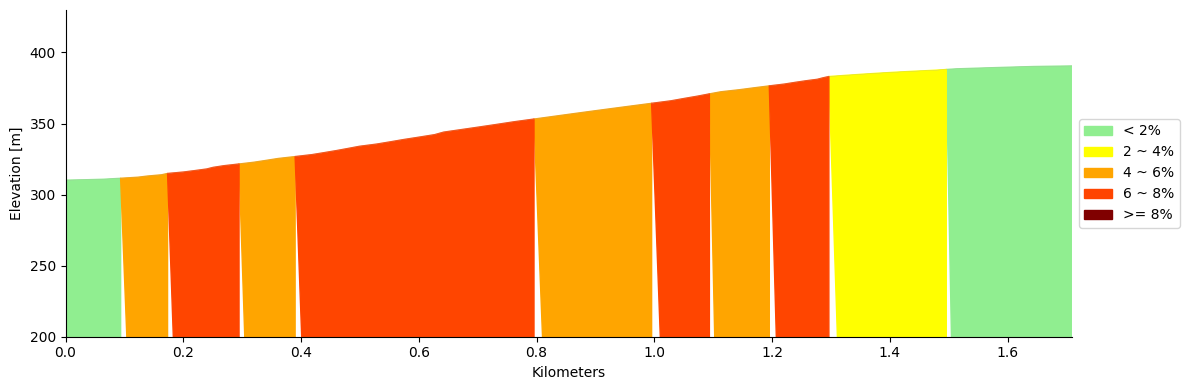

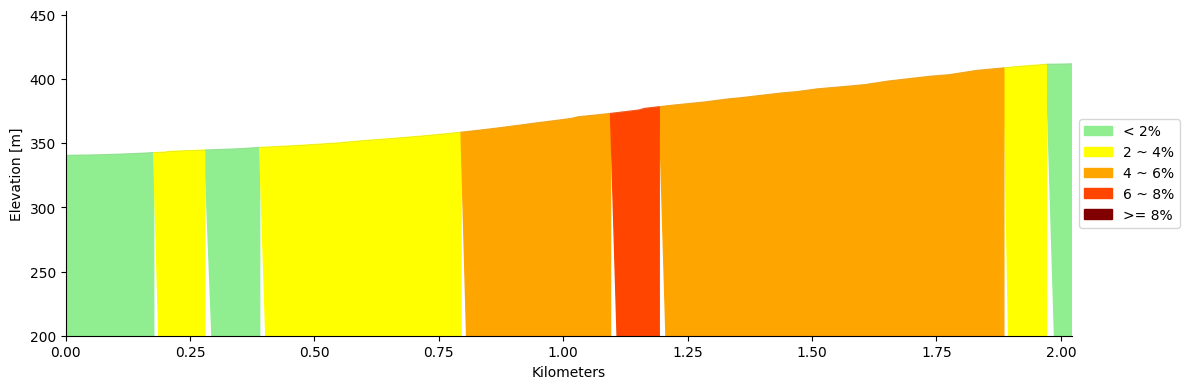

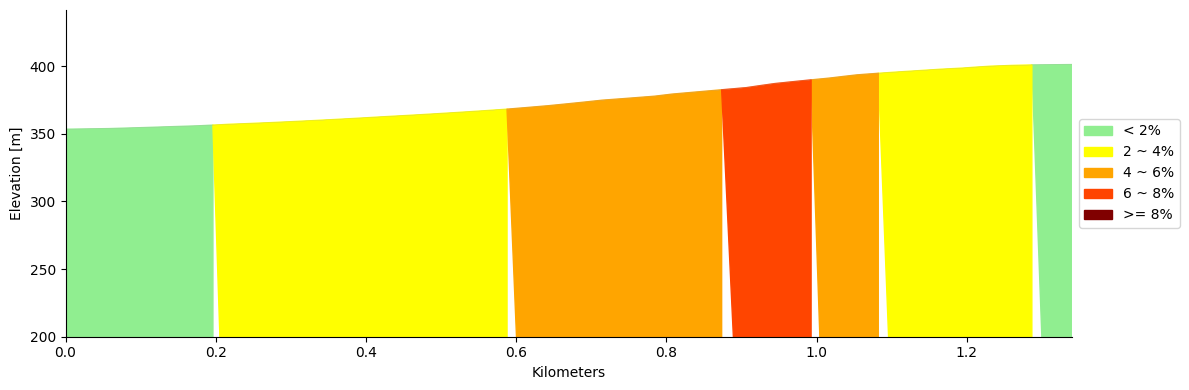

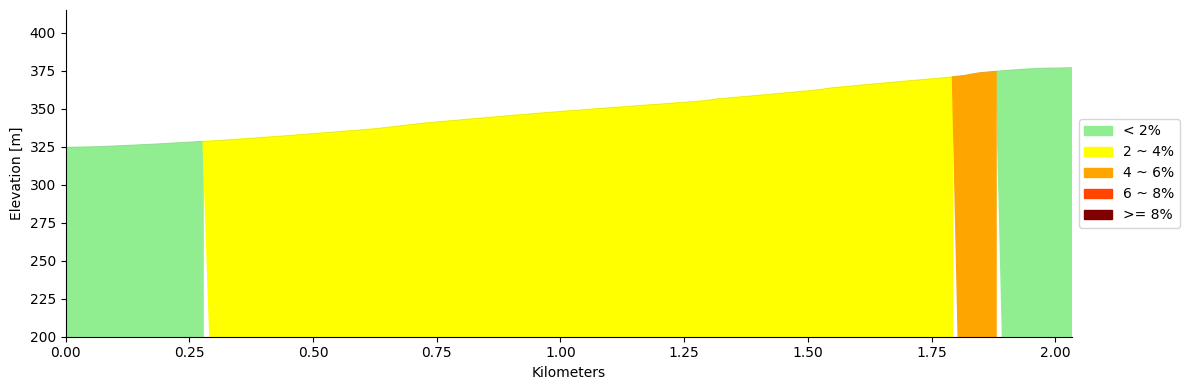

In [9]:
# elevation profile for each climb
for i, row in enumerate(climbs.itertuples()):
    climb_df = track_df.iloc[
        track_df['km'].sub(row.start_km).abs().idxmin():
        track_df['km'].sub(row.end_km).abs().idxmin() + 1
    ].reset_index(drop=True)

    climb_df["km"] -= climb_df["km"].iloc[0]
    climb_profile = ElevationProfile(climb_df, seg_unit_km=0.1)
    fig_c, ax_c = climb_profile.plot_profile(
        show_labels=False,
        show_background=False
        )